<a href="https://colab.research.google.com/github/CesarAlejandroSoto/Arquitectura-de-Computadores/blob/main/PROYECTO_3_GRUPO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1> <font color = '#FE0E0E'> Integrantes </font> </h1>**



*   CESAR ALEJANDRO SOTO PAIPA
*   JEISON FERNANDO GUARGUATI ANAYA
*   MARCOS JOSE ORJUELA MURILLO



**<h1> <font color = '#FE0E0E'> Objetivos </font> </h1>**


Construir lo siguiente:

* Bit

* Register

* RAM8

* RAM64

* RAM512

* RAM4K

* RAM16K

* PC


# <strong>1-BIT

<h2>Almacena un valor hasta que se le indique actualizarlo.

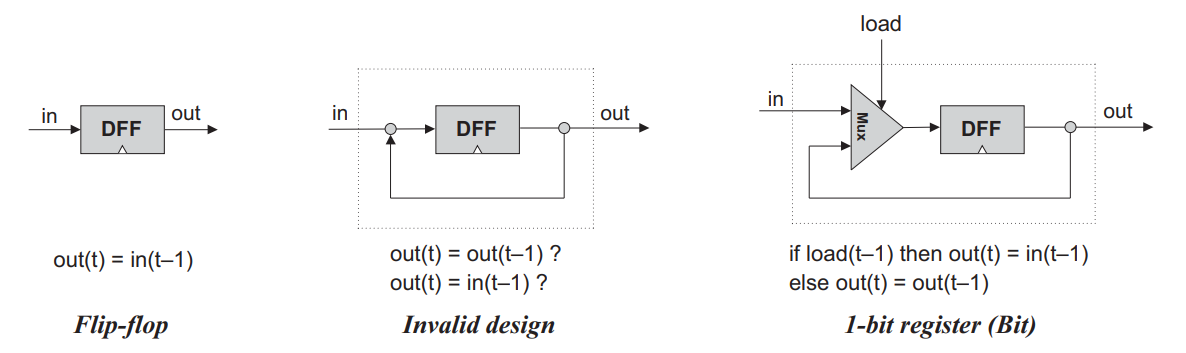

<h2>Utiliza un Flip flop tipo D

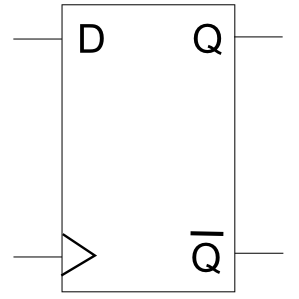

In [ ]:
def multiplexor(a, b, sel):
    # Esta función implementa un multiplexor de 2 entradas, seleccionando entre 'a' y 'b' según 'sel'.
    if sel == 1:
        return b
    else:
        return a

def bit_registro(entrada, cargar, estado_anterior):
    # Esta función representa un bit de registro, utilizando el multiplexor para actualizar su estado.
    nuevo_estado = multiplexor(estado_anterior, entrada, cargar)
    return nuevo_estado

# Estado inicial
estado = 0

# Lista de pruebas con combinaciones de entrada y señal de carga
pruebas = [
    (0, 0), (1, 0), (0, 1), (1, 1), (1, 0), (0, 1), (1, 1)
]

# Imprimir cabecera de la tabla
print("entrada  cargar  salida_anterior  ->  nueva_salida")

# Recorrer la lista de pruebas y evaluar el comportamiento del bit de registro
for entrada, cargar in pruebas:
    salida_anterior = estado  # Guardar el estado anterior
    estado = bit_registro(entrada, cargar, salida_anterior)  # Actualizar el estado

    # Imprimir la fila de la tabla con los valores actuales
    print(f"   {entrada}        {cargar}          {salida_anterior}              ->       {estado}")



entrada  cargar  salida_anterior  ->  nueva_salida
   0        0          0              ->       0
   1        0          0              ->       0
   0        1          0              ->       0
   1        1          0              ->       1
   1        0          1              ->       1
   0        1          1              ->       0
   1        1          0              ->       1


# <strong> Regristro_wbit



<h2>Ahora tiene 16 registros de 1 bit trabajando en paralelo.

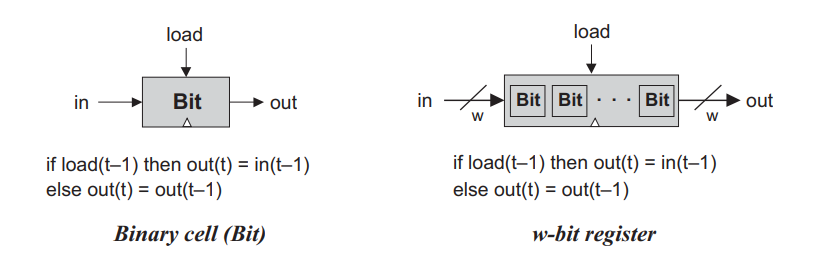

In [ ]:
def registro(entrada, cargar, estado_anterior):
    # Esta función representa un registro de 16 bits usando 16 bits individuales
    return [bit_registro(entrada[i], cargar, estado_anterior[i]) for i in range(16)]

# Estado inicial del registro (16 bits en 0)
estado = [0] * 16

# Lista de pruebas con combinaciones de entrada y señal de carga
pruebas = [
    ([0]*16, 0),
    ([1]*16, 0),
    ([0,1]*8, 1),
    ([1,0]*8, 1),
    ([1]*16, 0),
    ([0,1]*8, 1),
    ([1,0]*8, 1)
]

# Ejecutar pruebas y mostrar resultados de forma legible
for entrada, cargar in pruebas:
    salida_anterior = estado  # Guardar el estado anterior
    estado = registro(entrada, cargar, salida_anterior)  # Actualizar el estado

    # Imprimir información detallada
    print("-------------------------------------------")
    print(f"Entrada: {entrada}")
    print(f"Cargar: {cargar}")
    print(f"Estado anterior: {salida_anterior}")
    print(f"Nueva salida: {estado}")
    print("-------------------------------------------\n")

-------------------------------------------
Entrada: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cargar: 0
Estado anterior: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Nueva salida: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-------------------------------------------

-------------------------------------------
Entrada: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Cargar: 0
Estado anterior: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Nueva salida: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-------------------------------------------

-------------------------------------------
Entrada: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Cargar: 1
Estado anterior: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Nueva salida: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
-------------------------------------------

-------------------------------------------
Entrada: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Cargar: 1
Estado anterior: [0, 1, 0, 1, 

# <strong> Ram8

<h2>Es una memoria de 8 registros, donde cada registro puede almacenar una palabra de 16 bits.



*  Entrada (in): Un número de 16 bits que queremos almacenar.
*  Dirección (address): Un número de 3 bits (0 a 7) que indica en qué registro queremos guardar o leer datos.

*  Carga (load): Si es 1, guarda el valor en la dirección dada. Si es 0, no cambia nada.
*  Salida (out): Devuelve el valor almacenado en la dirección dada.





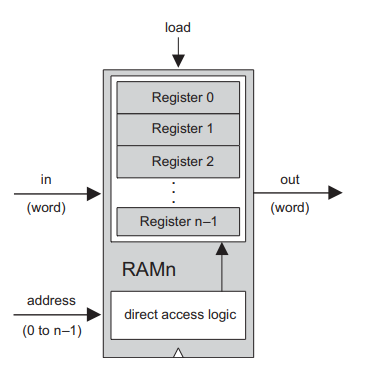

In [ ]:
def demultiplexor_8way(entrada, sel):
    # Demultiplexor de 8 vías para direccionar los registros en la RAM8
    resultado = [0] * 8
    resultado[sel] = entrada
    return resultado

def ram8(entrada, cargar, direccion, estado_anterior):
    # Simula una RAM de 8 registros de 16 bits
    cargas = demultiplexor_8way(cargar, direccion)  # Obtiene los bits de carga
    estado_nuevo = [registro(entrada, cargas[i], estado_anterior[i]) for i in range(8)]
    salida = estado_nuevo[direccion]  # Selecciona la salida según la dirección
    return estado_nuevo, salida

# Estado inicial de la RAM8 (8 registros de 16 bits en 0)
estado_ram = [[0] * 16 for _ in range(8)]

# Ejemplos de prueba
pruebas = [
    ([1]*16, 1, 3),  # Guardar todos 1 en la dirección 3
    ([0,1]*8, 1, 5)  # Guardar patrón alternante en la dirección 5
]

# Ejecutar pruebas y mostrar resultados
for entrada, cargar, direccion in pruebas:
    estado_anterior = [fila[:] for fila in estado_ram]  # Copiar estado antes de la operación
    estado_ram, salida = ram8(entrada, cargar, direccion, estado_anterior)

    print("-------------------------------------------")
    print(f"Entrada: {entrada}")
    print(f"Cargar: {cargar}")
    print(f"Dirección: {direccion}")
    print(f"Estado anterior en RAM:")
    for i, fila in enumerate(estado_anterior):
        print(f"Registro {i}: {fila}")
    print(f"Nueva salida: {salida}")
    print(f"Estado actualizado en RAM:")
    for i, fila in enumerate(estado_ram):
        print(f"Registro {i}: {fila}")
    print("-------------------------------------------\n")

-------------------------------------------
Entrada: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Cargar: 1
Dirección: 3
Estado anterior en RAM:
Registro 0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Registro 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Registro 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Registro 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Registro 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Registro 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Registro 6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Registro 7: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Nueva salida: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Estado actualizado en RAM:
Registro 0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Registro 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Registro 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Registro 3: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Registro 4: [0, 0, 0, 0, 0, 0

# <strong> Ram64

<h2>Es una memoria que almacena 64 registros de 16 bits cada uno. Se logra organizando la memoria en 8 bloques.

In [ ]:
def registro(entrada, cargar, estado_anterior):
    # Simula un registro que se carga si 'cargar' es 1
    if cargar:
        return entrada
    return estado_anterior

def ram64(entrada, cargar, direccion, estado_anterior):
    # Simula una RAM de 64 registros de 16 bits usando 8 RAM8
    estado_ram = [estado_anterior[i * 8:(i + 1) * 8] for i in range(8)]  # Divide el estado en 8 bloques de 8 registros
    sel = direccion >> 3  # Selecciona el bloque de RAM8
    dir_ram8 = direccion & 0b111  # Obtiene los 3 bits menos significativos para la dirección de RAM8

    # Carga en el bloque correspondiente
    nuevo_estado = ram8(entrada, cargar, dir_ram8, estado_ram[sel])

    # Actualiza el estado de la RAM64
    for i in range(8):
        estado_ram[sel][i] = nuevo_estado[0][i]

    # Aplana el estado de la RAM64
    estado_actualizado = [registro for bloque in estado_ram for registro in bloque]
    salida = nuevo_estado[1]  # Salida de la RAM8 seleccionada
    return estado_actualizado, salida

# Estado inicial de la RAM64 (64 registros de 16 bits en 0)
estado_ram64 = [[0] * 16 for _ in range(64)]

# Ejemplos de prueba
pruebas = [
    ([1]*16, 1, 3),  # Guardar todos 1 en la dirección 3
    ([0,1]*8, 1, 5),  # Guardar patrón alternante en la dirección 5
    ([1,0]*8, 1, 11)  # Guardar patrón alternante en la dirección 11
]

# Ejecutar pruebas y mostrar resultados
for entrada, cargar, direccion in pruebas:
    estado_anterior = [fila[:] for fila in estado_ram64]  # Copiar estado antes de la operación
    estado_ram64, salida = ram64(entrada, cargar, direccion, estado_anterior)

    print("-------------------------------------------")
    print(f"Entrada: {entrada}")
    print(f"Cargar: {cargar}")
    print(f"Dirección: {direccion}")
    print(f"Nueva salida: {salida}")
    print(f"Dirección: {direccion}")
    print("-------------------------------------------\n")

-------------------------------------------
Entrada: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Cargar: 1
Dirección: 3
Nueva salida: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Dirección: 3
-------------------------------------------

-------------------------------------------
Entrada: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Cargar: 1
Dirección: 5
Nueva salida: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Dirección: 5
-------------------------------------------

-------------------------------------------
Entrada: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Cargar: 1
Dirección: 11
Nueva salida: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Dirección: 11
-------------------------------------------



# <strong> Ram512

<h2>Es lo mismo que la RAM64, pero tiene 512 registros de 16 bits.

In [ ]:
def ram512(entrada, cargar, direccion, estado_anterior):
    # Simula una RAM de 512 registros de 16 bits usando 8 RAM64
    estado_ram = [estado_anterior[i * 64:(i + 1) * 64] for i in range(8)]  # Divide el estado en 8 bloques de 64 registros
    sel = direccion >> 6  # Selecciona el bloque de RAM64
    dir_ram64 = direccion & 0b111111  # Obtiene los 6 bits menos significativos para la dirección de RAM64

    # Carga en el bloque correspondiente
    nuevo_estado = ram64(entrada, cargar, dir_ram64, estado_ram[sel])

    # Actualiza el estado de la RAM512
    for i in range(64):
        estado_ram[sel][i] = nuevo_estado[0][i]

    # Aplana el estado de la RAM512
    estado_actualizado = [registro for bloque in estado_ram for registro in bloque]
    salida = nuevo_estado[1]  # Salida de la RAM64 seleccionada
    return estado_actualizado, salida

def registro(entrada, cargar, estado_anterior):
    # Simula un registro que se carga si 'cargar' es 1
    if cargar:
        return entrada
    return estado_anterior

# Estado inicial de la RAM512 (512 registros de 16 bits en 0)
estado_ram512 = [[0] * 16 for _ in range(512)]

# Ejemplos de prueba
pruebas = [
    ([1]*16, 1, 3),  # Guardar todos 1 en la dirección 3
    ([0,1]*8, 1, 5),  # Guardar patrón alternante en la dirección 5
    ([1,0]*8, 1, 11),  # Guardar patrón alternante en la dirección 11
    ([1]*16, 1, 64),  # Guardar todos 1 en la dirección 64
    ([0,1]*8, 1, 128)  # Guardar patrón alternante en la dirección 128
]

# Ejecutar pruebas y mostrar resultados
for entrada, cargar, direccion in pruebas:
    estado_anterior = [fila[:] for fila in estado_ram512]  # Copiar estado antes de la operación
    estado_ram512, salida = ram512(entrada, cargar, direccion, estado_anterior)

    print("-------------------------------------------")
    print(f"Entrada: {entrada}")
    print(f"Cargar: {cargar}")
    print(f"Dirección: {direccion}")
    print(f"Nueva salida: {salida}")
    print(f"Dirección: {direccion}")
    print("-------------------------------------------\n")

-------------------------------------------
Entrada: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Cargar: 1
Dirección: 3
Nueva salida: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Dirección: 3
-------------------------------------------

-------------------------------------------
Entrada: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Cargar: 1
Dirección: 5
Nueva salida: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Dirección: 5
-------------------------------------------

-------------------------------------------
Entrada: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Cargar: 1
Dirección: 11
Nueva salida: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Dirección: 11
-------------------------------------------

-------------------------------------------
Entrada: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Cargar: 1
Dirección: 64
Nueva salida: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Dirección: 64
-------------------------------------------

------------

# <strong> Ram4k

<h2>Contiene 4096 registros de 16 bits.

In [ ]:
def ram4k(entrada, cargar, direccion, estado_anterior):
    # Simula una RAM de 4K registros de 16 bits usando 8 RAM512
    estado_ram = [estado_anterior[i * 512:(i + 1) * 512] for i in range(8)]  # Divide el estado en 8 bloques de 512 registros
    sel = direccion >> 9  # Selecciona el bloque de RAM512
    dir_ram512 = direccion & 0b111111111  # Obtiene los 9 bits menos significativos para la dirección de RAM512

    # Carga en el bloque correspondiente
    nuevo_estado = ram512(entrada, cargar, dir_ram512, estado_ram[sel])

    # Actualiza el estado de la RAM4K
    for i in range(512):
        estado_ram[sel][i] = nuevo_estado[0][i]

    # Aplana el estado de la RAM4K
    estado_actualizado = [registro for bloque in estado_ram for registro in bloque]
    salida = nuevo_estado[1]  # Salida de la RAM512 seleccionada
    return estado_actualizado, salida

def registro(entrada, cargar, estado_anterior):
    # Simula un registro que se carga si 'cargar' es 1
    if cargar:
        return entrada
    return estado_anterior

# Estado inicial de la RAM4K (4096 registros de 16 bits en 0)
estado_ram4k = [[0] * 16 for _ in range(4096)]

# Ejemplos de prueba
pruebas = [
    ([1]*16, 1, 3),  # Guardar todos 1 en la dirección 3
    ([0,1]*8, 1, 5),  # Guardar patrón alternante en la dirección 5
    ([1,0]*8, 1, 11),  # Guardar patrón alternante en la dirección 11
    ([1]*16, 1, 512),  # Guardar todos 1 en la dirección 512
    ([0,1]*8, 1, 1024)  # Guardar patrón alternante en la dirección 1024
]

# Ejecutar pruebas y mostrar resultados
for entrada, cargar, direccion in pruebas:
    estado_anterior = [fila[:] for fila in estado_ram4k]  # Copiar estado antes de la operación
    estado_ram4k, salida = ram4k(entrada, cargar, direccion, estado_anterior)

    print("-------------------------------------------")
    print(f"Entrada: {entrada}")
    print(f"Cargar: {cargar}")
    print(f"Dirección: {direccion}")
    print(f"Nueva salida: {salida}")
    print(f"Dirección: {direccion}")
    print("-------------------------------------------\n")

-------------------------------------------
Entrada: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Cargar: 1
Dirección: 3
Nueva salida: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Dirección: 3
-------------------------------------------

-------------------------------------------
Entrada: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Cargar: 1
Dirección: 5
Nueva salida: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Dirección: 5
-------------------------------------------

-------------------------------------------
Entrada: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Cargar: 1
Dirección: 11
Nueva salida: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Dirección: 11
-------------------------------------------

-------------------------------------------
Entrada: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Cargar: 1
Dirección: 512
Nueva salida: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Dirección: 512
-------------------------------------------

----------

# <strong> Ram16k

<h2>Es aún más grande, con 16,384 registros de 16 bits.

In [ ]:
def ram16k(entrada, cargar, direccion, estado_anterior):
    # Simula una RAM de 16K registros de 16 bits usando 4 RAM4K
    estado_ram = [estado_anterior[i * 4096:(i + 1) * 4096] for i in range(4)]  # Divide el estado en 4 bloques de 4096 registros
    sel = direccion >> 12  # Selecciona el bloque de RAM4K
    dir_ram4k = direccion & 0b111111111111  # Obtiene los 12 bits menos significativos para la dirección de RAM4K

    # Carga en el bloque correspondiente
    nuevo_estado = ram4k(entrada, cargar, dir_ram4k, estado_ram[sel])

    # Actualiza el estado de la RAM16K
    for i in range(4096):
        estado_ram[sel][i] = nuevo_estado[0][i]

    # Aplana el estado de la RAM16K
    estado_actualizado = [registro for bloque in estado_ram for registro in bloque]
    salida = nuevo_estado[1]  # Salida de la RAM4K seleccionada
    return estado_actualizado, salida

def registro(entrada, cargar, estado_anterior):
    # Simula un registro que se carga si 'cargar' es 1
    if cargar:
        return entrada
    return estado_anterior

# Estado inicial de la RAM16K (16384 registros de 16 bits en 0)
estado_ram16k = [[0] * 16 for _ in range(16384)]

# Ejemplos de prueba
pruebas = [
    ([1]*16, 1, 3),  # Guardar todos 1 en la dirección 3
    ([0,1]*8, 1, 5),  # Guardar patrón alternante en la dirección 5
    ([1,0]*8, 1, 11),  # Guardar patrón alternante en la dirección 11
    ([1]*16, 1, 4096),  # Guardar todos 1 en la dirección 4096
    ([0,1]*8, 1, 8192)  # Guardar patrón alternante en la dirección 8192
]

# Ejecutar pruebas y mostrar resultados
for entrada, cargar, direccion in pruebas:
    estado_anterior = [fila[:] for fila in estado_ram16k]  # Copiar estado antes de la operación
    estado_ram16k, salida = ram16k(entrada, cargar, direccion, estado_anterior)

    print("-------------------------------------------")
    print(f"Entrada: {entrada}")
    print(f"Cargar: {cargar}")
    print(f"Dirección: {direccion}")
    print(f"Nueva salida: {salida}")
    print(f"Dirección: {direccion}")
    print("-------------------------------------------\n")

-------------------------------------------
Entrada: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Cargar: 1
Dirección: 3
Nueva salida: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Dirección: 3
-------------------------------------------

-------------------------------------------
Entrada: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Cargar: 1
Dirección: 5
Nueva salida: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Dirección: 5
-------------------------------------------

-------------------------------------------
Entrada: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Cargar: 1
Dirección: 11
Nueva salida: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Dirección: 11
-------------------------------------------

-------------------------------------------
Entrada: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Cargar: 1
Dirección: 4096
Nueva salida: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Dirección: 4096
-------------------------------------------

--------

# <strong> PC

<h2>El PC (Program Counter) es un registro especial que guarda la dirección de la siguiente instrucción a ejecutar en un programa.</h2>



*   Si load = 1, guarda un nuevo valor.
*   Si reset = 1, se pone en 0 (reinicio).
*   Si inc = 1, aumenta en 1 (avanza a la siguiente instrucción).


In [ ]:
def registro(entrada, cargar, estado_anterior):
    # Simula un registro que se carga si 'cargar' es 1
    if cargar:
        return entrada
    return estado_anterior

def pc(in_val, reset, load, inc, estado_anterior):
    # Simula un contador de programa (PC)
    # Si reset es 1, el PC se reinicia a 0
    if reset:
        nuevo_estado = [0] * 16
    else:
        # Si se carga un nuevo valor, se usa 'load'
        if load:
            nuevo_estado = in_val
        else:
            # Si se incrementa, se suma 1 al valor actual
            if inc:
                nuevo_estado = [bit ^ 1 for bit in estado_anterior]  # Incrementar el valor
                # Manejo de acarreo para el incremento
                carry = 1
                for i in range(15, -1, -1):
                    if estado_anterior[i] == 1 and carry == 1:
                        nuevo_estado[i] = 0
                    elif carry == 1:
                        nuevo_estado[i] = 1
                        carry = 0
            else:
                nuevo_estado = estado_anterior  # Mantener el valor actual

    return nuevo_estado

# Estado inicial del PC (16 bits en 0)
estado_pc = [0] * 16

# Ejemplos de prueba
pruebas = [
    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 0, 1, 0),  # Cargar 1
    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 0, 0, 1),  # Incrementar
    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 1, 0, 0),  # Reset
    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 0, 1, 0),  # Cargar 1
    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 0, 0, 1)   # Incrementar
]

# Ejecutar pruebas y mostrar resultados
for in_val, reset, load, inc in pruebas:
    estado_anterior = estado_pc[:]  # Copiar estado antes de la operación
    estado_pc = pc(in_val, reset, load, inc, estado_anterior)

    print("-------------------------------------------")
    print(f"Entrada: {in_val}")
    print(f"Reset: {reset}")
    print(f"Cargar: {load}")
    print(f"Incrementar: {inc}")
    print(f"Nueva salida: {estado_pc}")
    print("-------------------------------------------\n")

-------------------------------------------
Entrada: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Reset: 0
Cargar: 1
Incrementar: 0
Nueva salida: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
-------------------------------------------

-------------------------------------------
Entrada: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Reset: 0
Cargar: 0
Incrementar: 1
Nueva salida: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
-------------------------------------------

-------------------------------------------
Entrada: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Reset: 1
Cargar: 0
Incrementar: 0
Nueva salida: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-------------------------------------------

-------------------------------------------
Entrada: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Reset: 0
Cargar: 1
Incrementar: 0
Nueva salida: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
-------------------------------------------

------------------------